## Feature Engineering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ift6758.features.feature_engineering1 import SeasonDataSet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
import pandas as pd


In [3]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [4]:
train_years = [2015,2016,2017,2018]
test_years=[2019]


In [5]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [6]:
train_df[(train_df['gamePk']==2018020722)&(train_df['result.event']=='Goal')]

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
297845,Goal,2018020722,Boston Bruins,1,04:39,REGULAR,15:21,-85.0,-22.0,Snap Shot,0,Power Play,David Pastrnak,Carter Hart,"(89, 0)",1,175.385290,7.206057
297852,Goal,2018020722,Boston Bruins,1,09:12,REGULAR,10:48,67.0,-16.0,Snap Shot,0,Even,Peter Cehlarik,Carter Hart,"(89, 0)",1,27.202941,36.027373
297855,Goal,2018020722,Philadelphia Flyers,1,12:44,REGULAR,07:16,-67.0,-12.0,Snap Shot,0,Even,Oskar Lindblom,Jaroslav Halak,"(-89, 0)",1,25.059928,-28.610460
297863,Goal,2018020722,Philadelphia Flyers,2,05:32,REGULAR,14:28,74.0,-12.0,Tip-In,0,Even,Sean Couturier,Jaroslav Halak,"(89, 0)",1,19.209373,38.659808
297867,Goal,2018020722,Philadelphia Flyers,2,06:47,REGULAR,13:13,-32.0,-6.0,Tip-In,0,Power Play,Sean Couturier,Jaroslav Halak,"(89, 0)",1,121.148669,2.838788
297898,Goal,2018020722,Philadelphia Flyers,3,15:53,REGULAR,04:07,-65.0,-18.0,Snap Shot,0,Even,Sean Couturier,Jaroslav Halak,"(-89, 0)",1,30.000000,-36.869898
297900,Goal,2018020722,Boston Bruins,3,18:54,REGULAR,01:06,78.0,7.0,Tip-In,0,Even,Peter Cehlarik,Carter Hart,"(89, 0)",1,13.038405,-32.471192


In [7]:
train_df[(train_df['distanceNet']>150)&(train_df['result.event']=='Goal')&(train_df['about.period']<3)]

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
19,Goal,2015020001,Toronto Maple Leafs,2,00:19,REGULAR,19:41,-73.0,-1.0,Deflected,0,Power Play,James van Riemsdyk,Carey Price,"(89, 0)",1,162.003086,0.353673
707,Goal,2015020013,New York Rangers,1,19:16,REGULAR,00:44,69.0,8.0,Backhand,0,Even,Mats Zuccarello,Sergei Bobrovsky,"(-89, 0)",1,158.202402,2.898577
721,Goal,2015020013,Columbus Blue Jackets,2,10:59,REGULAR,09:01,77.0,-7.0,Wrist Shot,0,Even,Cam Atkinson,Henrik Lundqvist,"(-89, 0)",1,166.147525,-2.414657
812,Goal,2015020015,Chicago Blackhawks,1,13:28,REGULAR,06:32,76.0,-3.0,Backhand,0,Short Handed,Artem Anisimov,Thomas Greiss,"(-89, 0)",1,165.027270,-1.041627
823,Goal,2015020015,New York Islanders,2,05:22,REGULAR,14:38,79.0,3.0,Wrist Shot,0,Even,John Tavares,Corey Crawford,"(-89, 0)",1,168.026784,1.023030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338481,Goal,2018040643,Team Central,2,01:15,REGULAR,08:45,-63.0,3.0,Wrist Shot,0,Even,Gabriel Landeskog,Braden Holtby,"(89, 0)",1,152.029602,-1.130691
338486,Goal,2018040643,Team Central,2,03:25,REGULAR,06:35,-73.0,2.0,Snap Shot,0,Even,Mikko Rantanen,Braden Holtby,"(89, 0)",1,162.012345,-0.707319
338489,Goal,2018040643,Team Central,2,04:38,REGULAR,05:22,-72.0,2.0,Wrist Shot,0,Even,Ryan O'Reilly,Braden Holtby,"(89, 0)",1,161.012422,-0.711712
338503,Goal,2018040643,Team Central,2,08:30,REGULAR,01:30,-72.0,4.0,Wrist Shot,0,Even,Mikko Rantanen,Braden Holtby,"(89, 0)",1,161.049682,-1.423205


In [8]:
df_features_y = train_df[["distanceNet", "angleNet", "result.emptyNet", "result.event"]]
df_features_y

,distanceNet,angleNet,result.emptyNet,result.event
0,34.525353,10.007980,0,Shot
1,10.000000,0.000000,0,Shot
2,14.035669,-4.085617,0,Shot
3,49.517674,-46.636577,0,Shot
4,28.017851,-2.045408,0,Shot
...,...,...,...,...
338503,161.049682,-1.423205,0,Goal
338504,155.003226,-0.369645,0,Goal
338505,26.419690,60.524111,0,Goal
338506,164.027437,1.047977,0,Shot


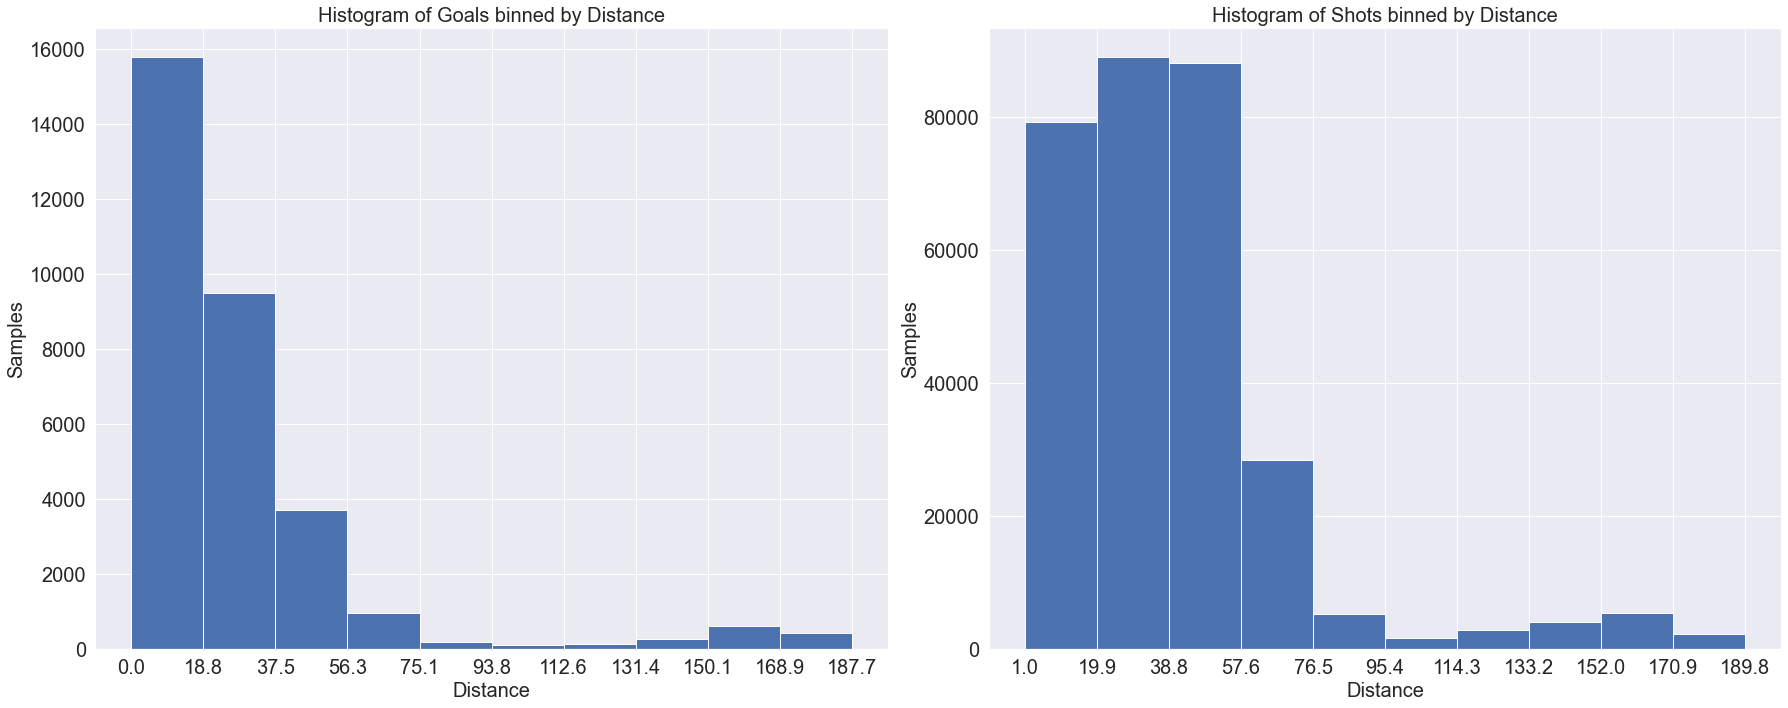

In [ ]:
df1 = df_features_y[df_features_y['result.event'] == 'Goal']
df2 = df_features_y[df_features_y['result.event'] == 'Shot']
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10))
n, bins, edges = ax1.hist(df1.distanceNet, bins=10)
ax1.tick_params(axis='both', which='both', labelsize=20)
ax1.set_xticks(bins)
ax1.set_xlabel('Distance', fontsize=20)
ax1.set_ylabel('Samples', fontsize=20)
ax1.set_title('Histogram of Goals binned by Distance', fontsize=20)

n, bins, edges = ax2.hist(df2.distanceNet, bins=10)
ax2.tick_params(axis='both', which='both', labelsize=20)
ax2.set_xticks(bins)
ax2.set_xlabel('Distance', fontsize=20)
ax2.set_ylabel('Samples', fontsize=20)
ax2.set_title('Histogram of Shots binned by Distance', fontsize=20)

plt.tight_layout()

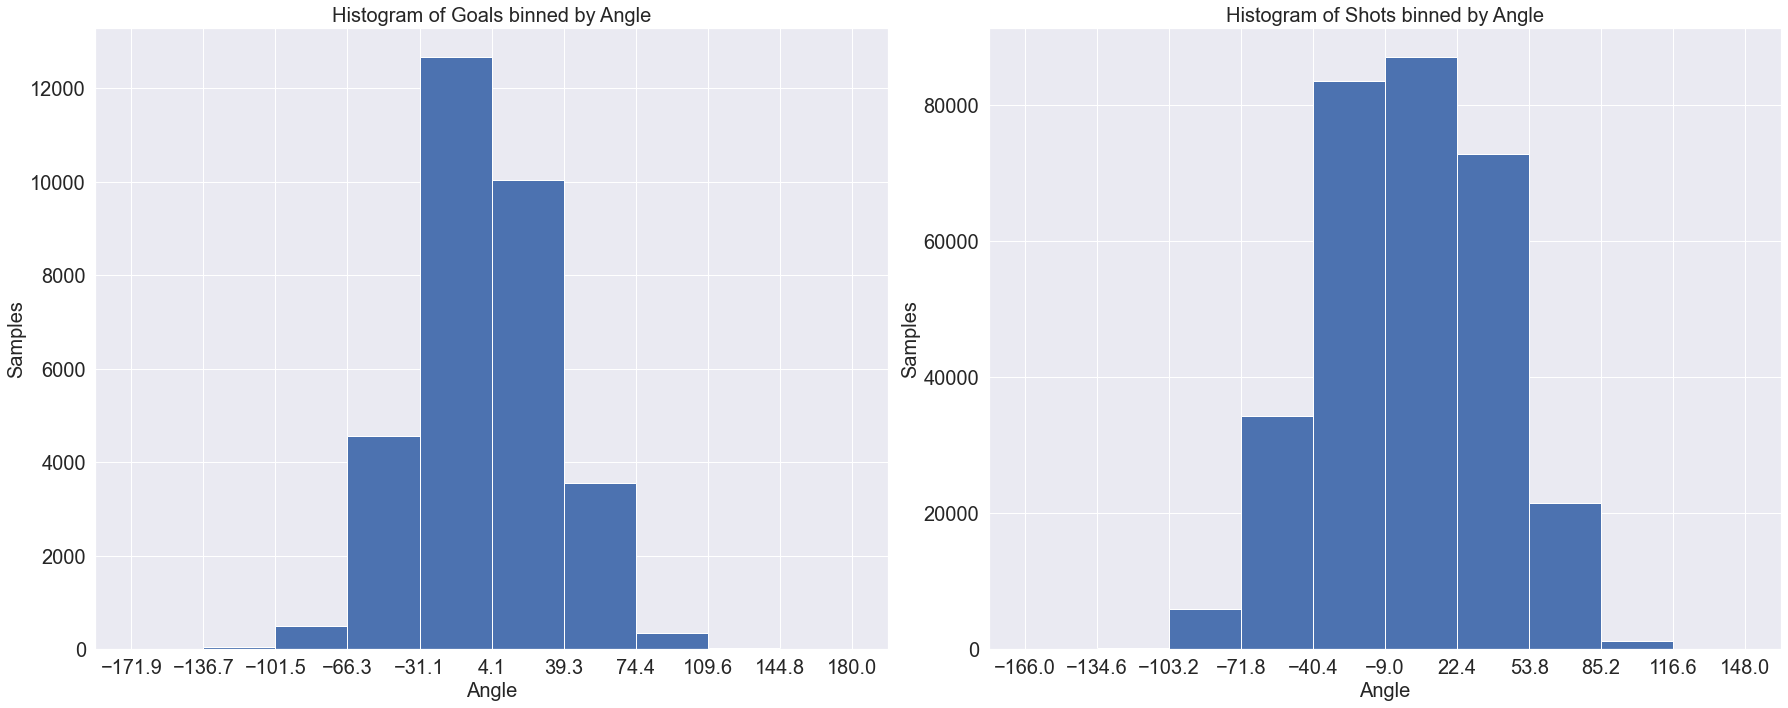

In [133]:
df1 = df_features_y[df_features_y['result.event'] == 'Goal']
df2 = df_features_y[df_features_y['result.event'] == 'Shot']
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10))
n, bins, edges = ax1.hist(df1.angleNet, bins=10)
ax1.tick_params(axis='both', which='both', labelsize=20)
ax1.set_xticks(bins)
ax1.set_xlabel('Angle', fontsize=20)
ax1.set_ylabel('Samples', fontsize=20)
ax1.set_title('Histogram of Goals binned by Angle', fontsize=20)

n, bins, edges = ax2.hist(df2.angleNet, bins=10)
ax2.tick_params(axis='both', which='both', labelsize=20)
ax2.set_xticks(bins)
ax2.set_xlabel('Angle', fontsize=20)
ax2.set_ylabel('Samples', fontsize=20)
ax2.set_title('Histogram of Shots binned by Angle', fontsize=20)

plt.tight_layout()

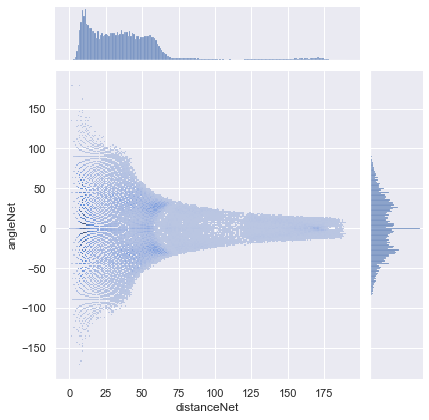

In [95]:
sns.jointplot(x=df_features_y['distanceNet'], y=df_features_y['angleNet'], kind="hist")

In [97]:
goal_rate = []
for i in range (0, 190, 10):
    df_temp = df_features_y[ (df_features_y.distanceNet >=i) & (df_features_y.distanceNet <(i+10))]
    df_temp['count'] = df_temp['result.event']
    df_temp = df_temp[['result.event','count']]
    df_temp= df_temp.groupby(['result.event'], as_index=False ).count()
    goal_rate.append(df_temp._get_value(0,'count') / (df_temp._get_value(0,'count') + df_temp._get_value(1,'count')))

C:\Users\callr\AppData\Local\Temp/ipykernel_18012/2537613211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


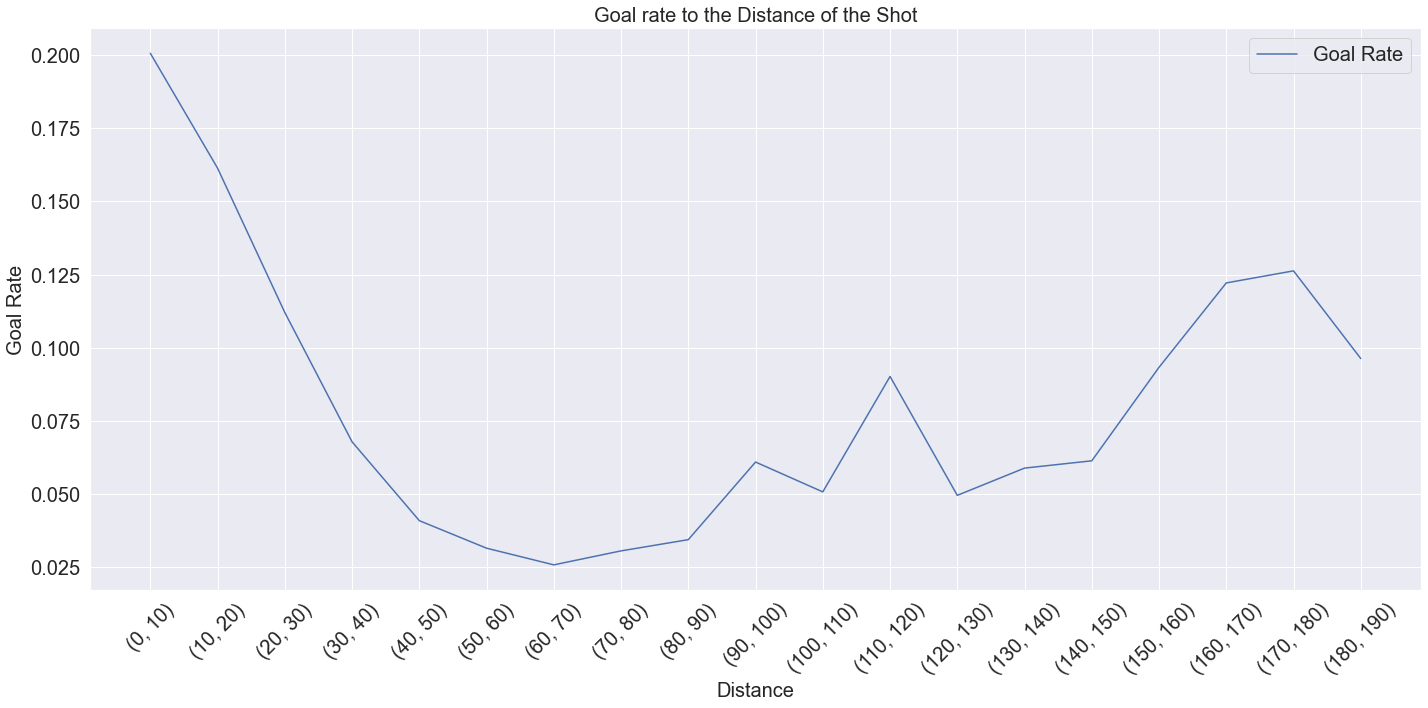

In [111]:
distance = [(i, i+10) for i in range (0, 190, 10)]
plt.figure(figsize=(20,10))
plt.plot([str(d) for d in distance], goal_rate, label='Goal Rate') 
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Goal Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Goal rate to the Distance of the Shot', fontsize=20)
plt.tight_layout()

In [120]:
goal_rate = []
for i in range (-100, 100, 10):
    df_temp = df_features_y[ (df_features_y.angleNet >=i) & (df_features_y.angleNet <(i+10))]
    df_temp['count'] = df_temp['result.event']
    df_temp = df_temp[['result.event','count']]
    df_temp= df_temp.groupby(['result.event'], as_index=False ).count()
    goal_rate.append(df_temp._get_value(0,'count') / (df_temp._get_value(0,'count') + df_temp._get_value(1,'count')))

C:\Users\callr\AppData\Local\Temp/ipykernel_18012/163922214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


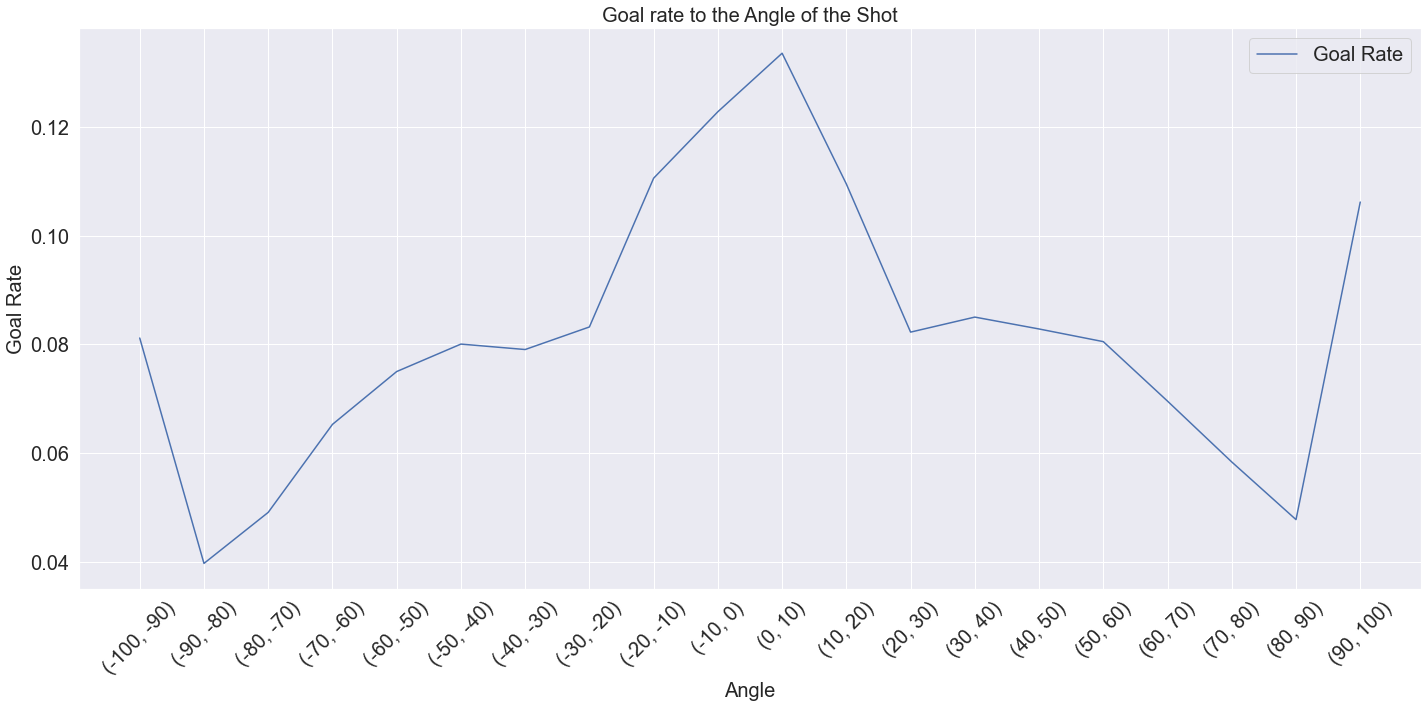

In [121]:
angle = [(i, i+10) for i in range (-100,100 ,10)]
plt.figure(figsize=(20,10))
plt.plot([str(a) for a in angle], goal_rate, label='Goal Rate') 
plt.xlabel('Angle', fontsize=20)
plt.ylabel('Goal Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Goal rate to the Angle of the Shot', fontsize=20)
plt.tight_layout()

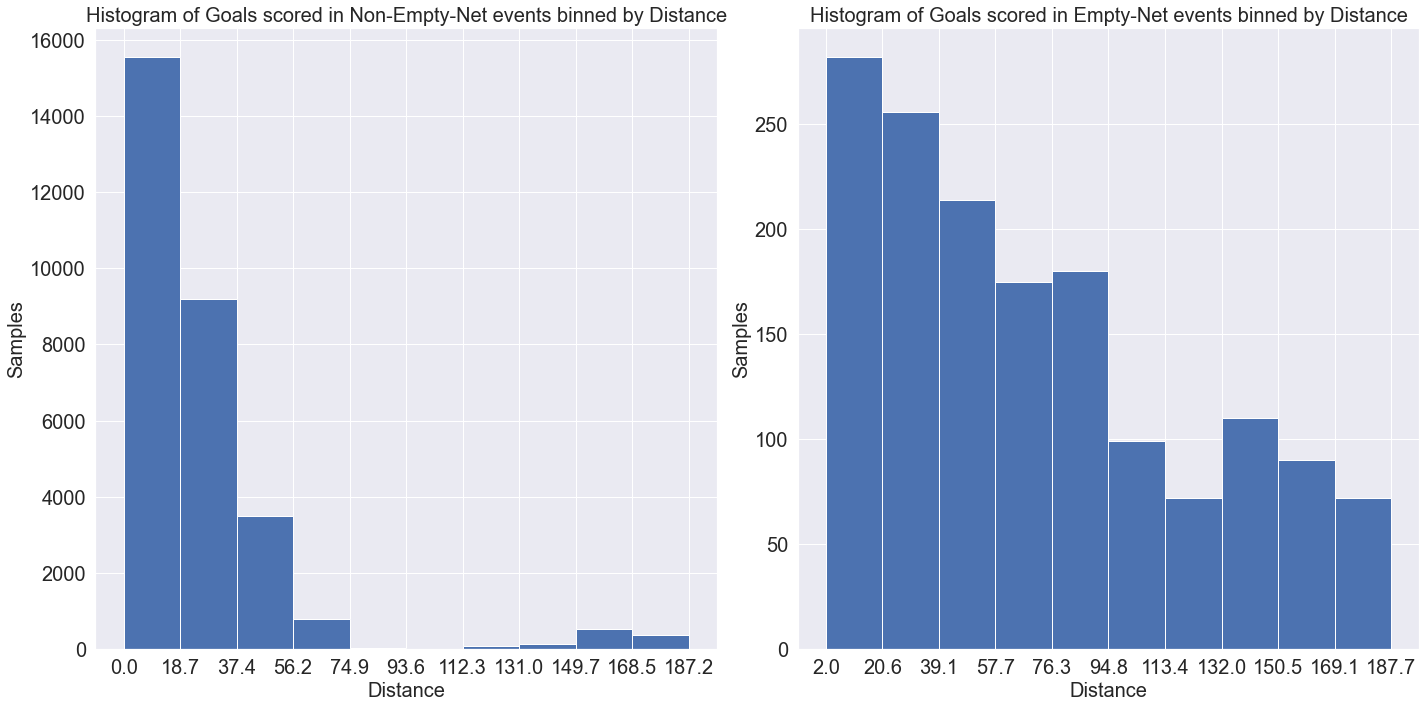

In [136]:
df = df_features_y[df_features_y['result.event'] == 'Goal']
df1 = df[df['result.emptyNet'] == 0]
df2 = df[df['result.emptyNet'] == 1]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
n, bins, edges = ax1.hist(df1.distanceNet, bins=10)
ax1.tick_params(axis='both', which='both', labelsize=20)
ax1.set_xticks(bins)
ax1.set_xlabel('Distance', fontsize=20)
ax1.set_ylabel('Samples', fontsize=20)
ax1.set_title('Histogram of Goals scored in Non-Empty-Net events binned by Distance', fontsize=20)

n, bins, edges = ax2.hist(df2.distanceNet, bins=10)
ax2.tick_params(axis='both', which='both', labelsize=20)
ax2.set_xticks(bins)
ax2.set_xlabel('Distance', fontsize=20)
ax2.set_ylabel('Samples', fontsize=20)
ax2.set_title('Histogram of Goals scored in Empty-Net events binned by Distance', fontsize=20)

plt.tight_layout()